# Mini projects

## Level 1

### Photo art app

1. Create a function that receives an image and converts it to a sketch so it looks similar to this:
![Example 1](img/sketch.png)

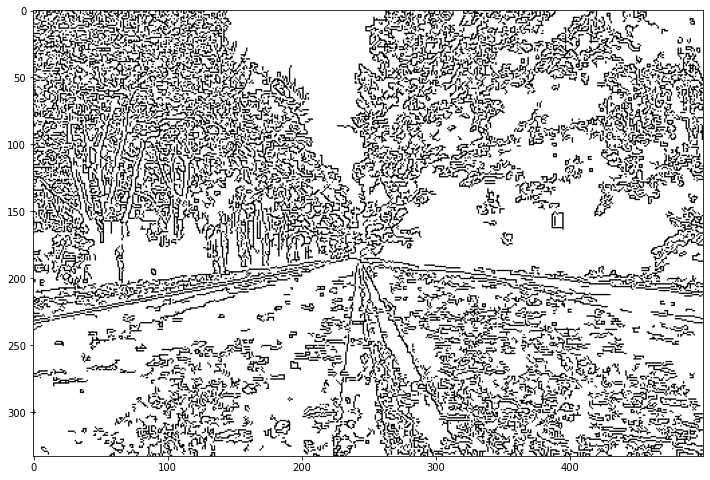

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread('img/photo.jpeg')
canny_image = cv2.Canny(image,100,200)
canny_image = cv2.bitwise_not(canny_image)
plt.figure(figsize = (12,12))
plt.imshow(canny_image,cmap = 'gray');

### Instagram filters app

1. Create a function that given a photo it applies a black and white filter
1. Create a filter that will change color of the image 

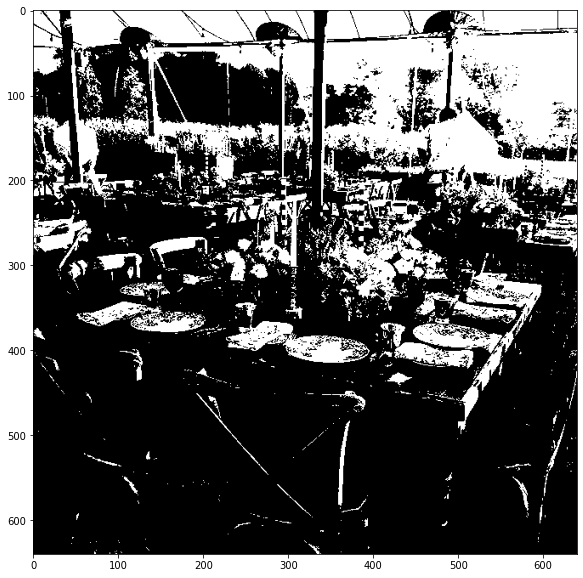

In [2]:
pic = cv2.imread('img/insta.jpg')
pics = pic.copy()
pic_gray = cv2.cvtColor(pics,cv2.COLOR_BGR2GRAY)
_,thresh = cv2.threshold(pic_gray,127,255,cv2.THRESH_BINARY)
plt.figure(figsize = (10,10))
plt.imshow(thresh,cmap = 'gray');

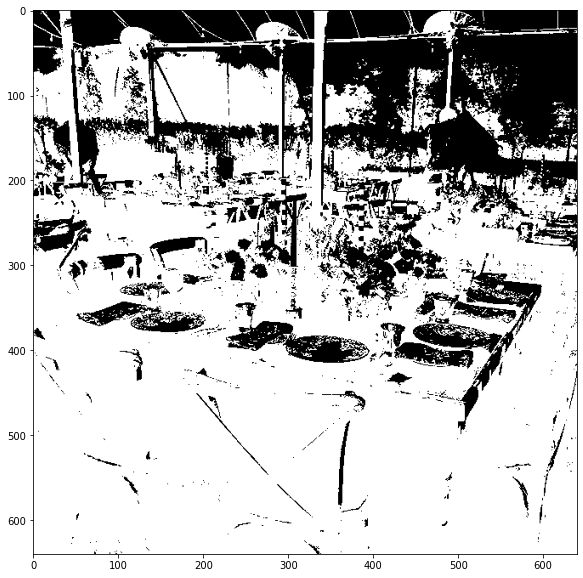

In [3]:
pic = cv2.imread('img/insta.jpg')
pics = pic.copy()
pic_gray = cv2.cvtColor(pics,cv2.COLOR_BGR2GRAY)
_,thresh = cv2.threshold(pic_gray,127,255,cv2.THRESH_BINARY_INV)
plt.figure(figsize = (10,10))
plt.imshow(thresh,cmap = 'gray');

## Level 2

### Photo art app

1. Change the app so it can now do the same but using your webcam to make it in real time  
**Hint:** you can use ```cv2.VideoCapture(0)```

-1

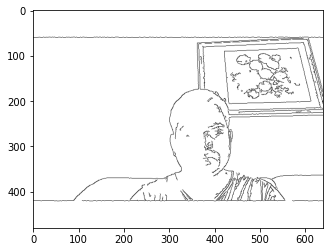

In [6]:
capture = cv2.VideoCapture(0)
ret_val,frame = capture.read()
gray_image = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gray_image,100,200)
canny = cv2.bitwise_not(canny)
plt.imshow(canny,cmap = 'gray')
capture.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

### Photo correction app

1. Create a funtion to clean *noise* from images
![Noisy image](img/n.png)

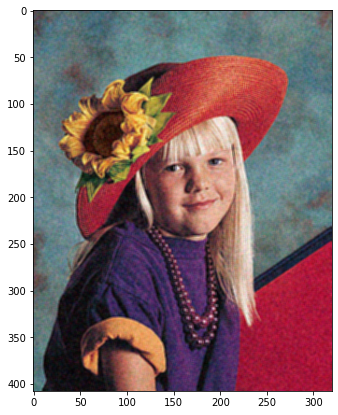

In [24]:
image_rgb = cv2.cvtColor(cv2.imread('img/noisy.png'),cv2.COLOR_BGR2RGB)
#_,thresh = cv2.threshold(image_rgb,0,255,cv2.THRESH_TOZERO)
kernel = np.ones((3,3),np.uint8)/9
image = cv2.filter2D(image_rgb,-1,kernel)
plt.figure(figsize = (7,7))
plt.imshow(image);

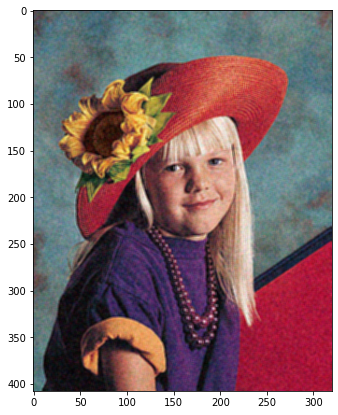

In [27]:
blurr = cv2.blur(image_rgb,(3,3))
plt.figure(figsize = (7,7))
plt.imshow(blurr);


### Instagram filters app

1. Create a function that applies a sepia filter to the image, for a BGR image apply this kernel:
        [0.272, 0.534, 0.131],
        [0.349, 0.686, 0.168],
        [0.393, 0.769, 0.189]
        
Get the BGR value of the pixel.
Calculate tr, tg and tb using the formula

tb = 0.272R + 0.534G + 0.131B
tg = 0.349R + 0.686G + 0.168B
tr = 0.393R + 0.769G + 0.189B

Take the integer value.

Set the new RGB value of the pixel as per the following condition:

If tb > 255 then b = 255 else b = tb
If tg > 255 then g = 255 else g = tg
If tr > 255 then r = 255 else r = tr


Example:

Consider a color pixel with the following values

A = 255

R = 100

G = 150

B = 200

Where A, R, G and B represents the Alpha, Red, Green and Blue value of the pixel.

Remember! ARGB will have an integer value in the range 0 to 255.

So, to convert the color pixel into sepia pixel we have to first calculate tr, tg and tb.

tr = 0.393(100) + 0.769(150) + 0.189(200)

tr = 192.45

tr = 192 (taking integer value)

Similarly,

tg = 0.349(100) + 0.686(150) + 0.168(200) = 171 (taking integer value)

and tb = 0.272(100) + 0.534(150) + 0.131(200) = 133 (taking integer value)

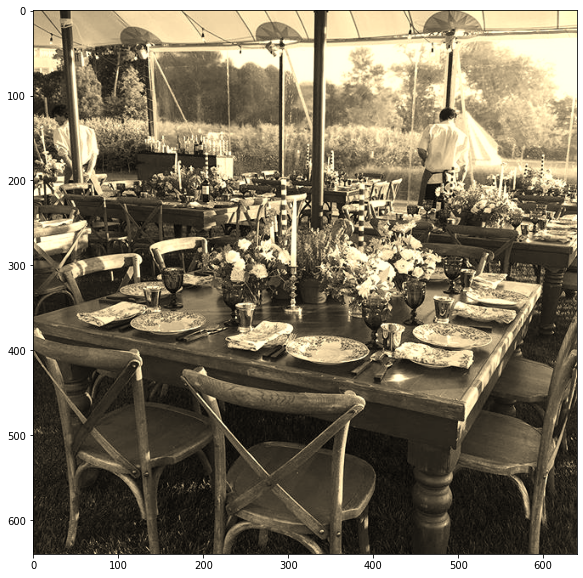

In [62]:
kernel = [[0.272, 0.534, 0.131],[0.349, 0.686, 0.168],[0.393, 0.769, 0.189]]
bgr_image = cv2.imread('img/insta.jpg')
image = bgr_image.copy()
B,G,R = cv2.split(image)

tb = 0.272*R + 0.534*G + 0.131*B
tg = 0.349*R + 0.686*G + 0.168*B
tr = 0.393*R + 0.769*G + 0.189*B

tb = tb.astype('int')
tg = tg.astype('int')
tr = tr.astype('int')

for i in range(len(tb)):
     for j in range(len(tb[i])):
            if tb[i][j] > 255:
                B[i][j] = 255
            else:
                B[i][j] = tb[i][j]
                
for i in range(len(tg)):
    for j in range(len(tg[i])):
        if tg[i][j] > 255:
            G[i][j] = 255
        else:
            G[i][j] = tg[i][j]

for i in range(len(tr)):
    for j in range(len(tr[i])):
        if tr[i][j] > 255:
            R[i][j] = 255
        else:
            R[i][j] = tr[i][j]

sepia = cv2.merge([B,G,R])
plt.figure(figsize = (10,10))
plt.imshow(cv2.cvtColor(sepia,cv2.COLOR_BGR2RGB));

## Level 3

### Instagram filters app

1. Apply the sepia filter by using the cv2.transfor function
1. Create different filters from the sepia filter so it renders different images

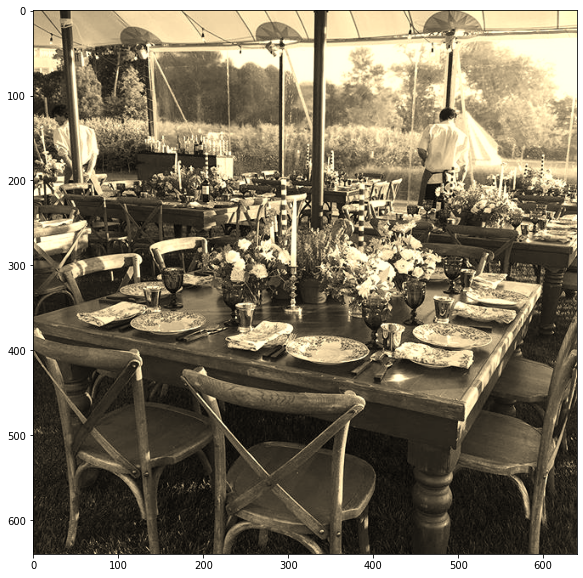

In [70]:
kernel = np.float32([[0.272, 0.534, 0.131],[0.349, 0.686, 0.168],[0.393, 0.769, 0.189]])
bgr_image = cv2.imread('img/insta.jpg')
image = bgr_image.copy()
sepia_filter = cv2.transform(image,kernel)
plt.figure(figsize = (10,10))
plt.imshow(cv2.cvtColor(sepia,cv2.COLOR_BGR2RGB));

# More projects

## Handwriting recognition

1. Write a one digit number (from 0 to 9) on a paper and using your mobile phone take a picture of it
1. Crop the image manually and pass it to a a function that will process it so it looks like a char in the MNIST dataset, make sure it is the correct size as well
![4](img/4.png)

1. Pass it through a MNIST classifier and print the prediction on screen

1. Modify the image so now it also contains the predicted result on the image
1. Try it with all digits

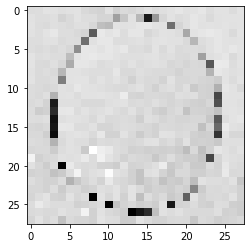

In [102]:
#images = ['img/one.jpg','img/two.jpg','img/three.jpg','img/four.jpg','img/five.jpg','img/six.jpg','img/seven.jpg','img/eight.jpg','img/nine.jpg','img/zero.jpg']
#new_images = []
# #for image in images:
img = cv2.imread('img/zerojpg.jpg',cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img,(28,28))

plt.imshow(img,cmap = 'gray')
#cv2.imwrite('0.jpg',img)